In [1]:
#reference: https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.11.0


In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


'/root/.keras/datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'

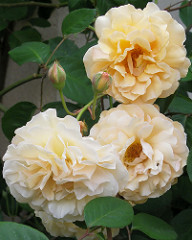

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))


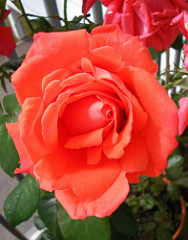

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [7]:
#Load data using a Keras utility
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


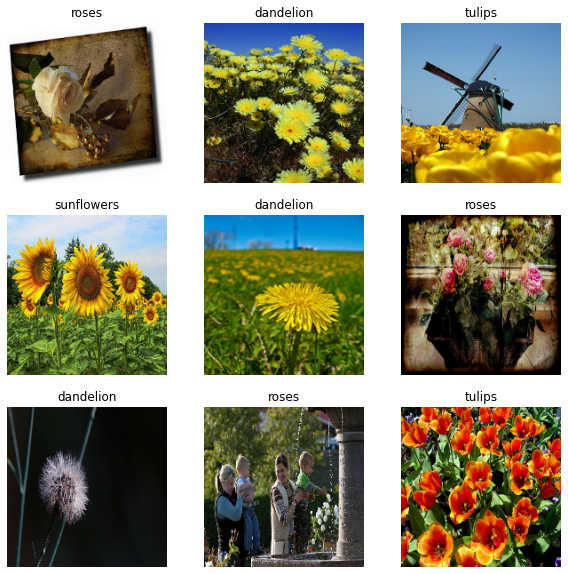

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [14]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
#Train a model
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [17]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 92s 970ms/step - loss: 1.2867 - accuracy: 0.4421 - val_loss: 1.0607 - val_accuracy: 0.5804
Epoch 2/3
92/92 [==============================] - 96s 1s/step - loss: 1.0143 - accuracy: 0.5889 - val_loss: 0.9467 - val_accuracy: 0.6349
Epoch 3/3
92/92 [==============================] - 91s 992ms/step - loss: 0.8676 - accuracy: 0.6635 - val_loss: 0.9015 - val_accuracy: 0.6526


In [22]:
train_loss, train_acc = model.evaluate(train_ds ,verbose=2)

print('\nTrain accuracy:', train_acc)

92/92 - 22s - loss: 0.7267 - accuracy: 0.7309 - 22s/epoch - 240ms/step

Train accuracy: 0.7309264540672302


In [23]:
test_loss, test_acc = model.evaluate(val_ds ,verbose=2)

print('\nVal accuracy:', test_acc)

23/23 - 7s - loss: 0.9015 - accuracy: 0.6526 - 7s/epoch - 284ms/step

Val accuracy: 0.6525885462760925


tf.Tensor(
[[[191.625    203.625    201.625   ]
  [191.75     205.38889  205.38889 ]
  [194.69444  207.2037   207.2037  ]
  ...
  [ 63.22687  112.226875 145.22687 ]
  [ 62.87498  110.87498  148.93048 ]
  [ 60.601837 108.60184  146.60184 ]]

 [[197.25     207.25     206.25    ]
  [196.25     208.25     208.25    ]
  [196.875    208.875    208.875   ]
  ...
  [ 65.44446  113.61113  149.11111 ]
  [ 64.750015 112.750015 152.25    ]
  [ 63.916656 111.91666  149.91666 ]]

 [[202.15741  211.41667  210.41667 ]
  [201.70833  211.70833  212.70833 ]
  [201.70833  211.70833  212.70833 ]
  ...
  [ 65.44446  113.44446  151.44446 ]
  [ 65.09721  113.09721  153.09721 ]
  [ 64.25927  112.25927  150.1019  ]]

 ...

 [[221.29166  222.29166  217.29166 ]
  [219.62498  221.52777  217.47223 ]
  [219.29166  221.29166  217.70834 ]
  ...
  [132.       176.       201.      ]
  [131.72217  173.81943  198.52776 ]
  [140.24062  177.22217  197.74074 ]]

 [[222.375    223.375    217.375   ]
  [222.       223.       2

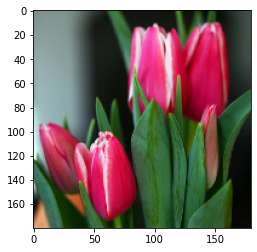

In [37]:
for images, labels in val_ds.take(1):
  for i in range(0,9):
    #model.predict(image)
    import cv2 
    plt.imshow(images[i].numpy().astype("uint8"))
    print(images[i])

In [25]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

23/23 [==============================] - 6s 272ms/step


array([[ 0.07328271,  0.8500263 , -0.41001964, -1.1942747 , -0.7919307 ],
       [ 1.1058822 , -0.1574369 , -0.98528165, -0.6394677 ,  0.04769011],
       [-1.7385695 , -0.77140045, -0.87998873,  2.6113825 ,  0.6047804 ],
       ...,
       [-0.10431376,  1.9816334 , -0.25722277, -2.4150255 , -0.7097553 ],
       [ 1.4106711 ,  1.3011587 , -1.6978058 , -0.838757  , -1.3465147 ],
       [-0.180935  ,  2.0920389 , -0.4224843 , -2.0408885 , -1.0656924 ]],
      dtype=float32)

In [47]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [57]:
predictions = probability_model.predict(val_ds)

23/23 [==============================] - 6s 263ms/step


In [58]:
predictions

array([[0.22253856, 0.48388338, 0.13724916, 0.0626487 , 0.0936802 ],
       [0.5186927 , 0.14664175, 0.06408098, 0.09055538, 0.18002929],
       [0.01065177, 0.02801934, 0.02513615, 0.8252431 , 0.1109496 ],
       ...,
       [0.09473782, 0.76284933, 0.08130474, 0.00939711, 0.05171108],
       [0.47396296, 0.42479926, 0.02117142, 0.04998391, 0.03008249],
       [0.08290408, 0.8048517 , 0.06511369, 0.01290649, 0.03422399]],
      dtype=float32)

In [ ]:
#some more unnecessary exploring

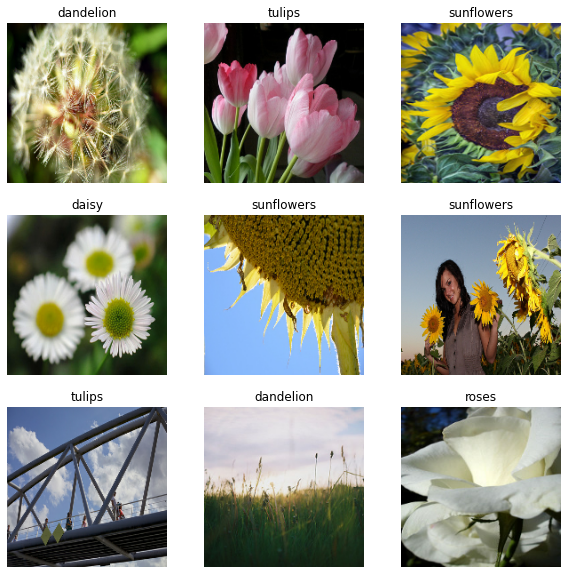

In [70]:
train_ds

AttributeError: ignored